In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/graduate-admission-dataset/graduate_admission1.csv")

In [4]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Chance of Admit
0,295,96,2,4.9,1.7,2.93,0,0.612
1,340,119,3,4.1,1.7,3.76,0,0.708
2,336,96,1,3.2,1.8,3.12,1,0.728
3,337,108,4,3.4,1.3,2.11,0,0.643
4,323,98,1,1.1,1.3,3.40,0,0.524


In [5]:
df.shape

(1000, 8)

In [8]:
pd.set_option("display.float_format", lambda x: f"{x:,.3f}")
sns.set(context="notebook")

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,Research,Chance of Admit
0,295,96,2,4.900,1.700,2.930,0,0.612
1,340,119,3,4.100,1.700,3.760,0,0.708
2,336,96,1,3.200,1.800,3.120,1,0.728
3,337,108,4,3.400,1.300,2.110,0,0.643
4,323,98,1,1.100,1.300,3.400,0,0.524


In [9]:
plt.rcParams["figure.figsize"] = (8,5)

In [10]:
df.columns = (
    df.columns.str.strip()
              .str.replace(" ", "_")
              .str.replace(r"[()]", "", regex=True)
)
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,GPA,Research,Chance_of_Admit
0,295,96,2,4.900,1.700,2.930,0,0.612
1,340,119,3,4.100,1.700,3.760,0,0.708
2,336,96,1,3.200,1.800,3.120,1,0.728
3,337,108,4,3.400,1.300,2.110,0,0.643
4,323,98,1,1.100,1.300,3.400,0,0.524


In [13]:
# 3) Shape, dtypes, basic overview
print("Shape:", df.shape)
display(df.sample(5, random_state=42))
df.info()
df.describe()

Shape: (1000, 8)


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,GPA,Research,Chance_of_Admit
521,298,111,3,2.200,1.700,3.490,1,0.760
737,337,99,4,4.700,1.700,2.040,1,0.772
740,328,95,3,3.600,5.000,3.570,1,0.895
660,326,114,5,4.200,4.200,3.300,1,0.962
411,335,116,2,1.900,3.400,2.950,0,0.676


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          1000 non-null   int64  
 1   TOEFL_Score        1000 non-null   int64  
 2   University_Rating  1000 non-null   int64  
 3   SOP                1000 non-null   float64
 4   LOR                1000 non-null   float64
 5   GPA                1000 non-null   float64
 6   Research           1000 non-null   int64  
 7   Chance_of_Admit    1000 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,GPA,Research,Chance_of_Admit
count,"1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000","1,000.000"
mean,315.840,106.459,3.053,2.997,3.014,3.027,0.517,0.729
std,15.083,8.450,1.421,1.163,1.163,0.583,0.500,0.095
min,290.000,92.000,1.000,1.000,1.000,2.000,0.000,0.491
25%,303.000,99.000,2.000,2.000,2.000,2.530,0.000,0.655
50%,316.000,107.000,3.000,3.000,3.000,3.025,1.000,0.728
75%,329.000,114.000,4.000,4.000,4.000,3.550,1.000,0.801
max,340.000,120.000,5.000,5.000,5.000,4.000,1.000,0.970


In [14]:
#Missing values & duplicates
print(df.isna().sum())
dup_count = df.duplicated().sum()
print("Duplicates:", dup_count)

# drop duplicates if any
df = df.drop_duplicates().reset_index(drop=True)


GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
GPA                  0
Research             0
Chance_of_Admit      0
dtype: int64
Duplicates: 0


In [15]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,GPA,Research,Chance_of_Admit
0,295,96,2,4.900,1.700,2.930,0,0.612
1,340,119,3,4.100,1.700,3.760,0,0.708
2,336,96,1,3.200,1.800,3.120,1,0.728
3,337,108,4,3.400,1.300,2.110,0,0.643
4,323,98,1,1.100,1.300,3.400,0,0.524


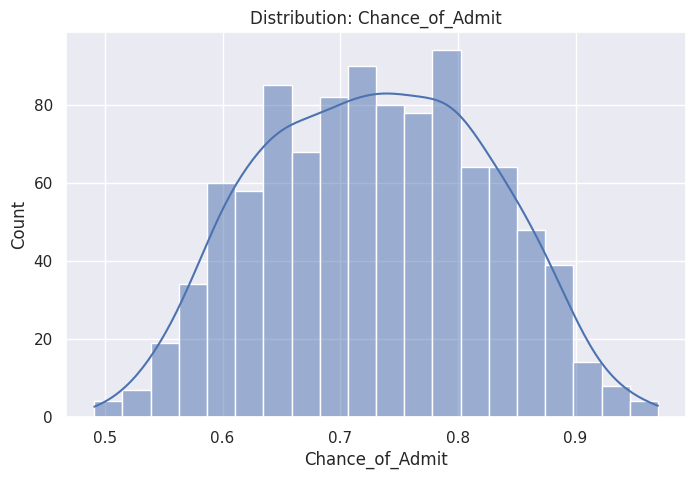

In [19]:
#Target distribution
fig, ax = plt.subplots()
sns.histplot(df["Chance_of_Admit"], bins=20, kde=True, ax=ax)
ax.set_title("Distribution: Chance_of_Admit")
plt.show()


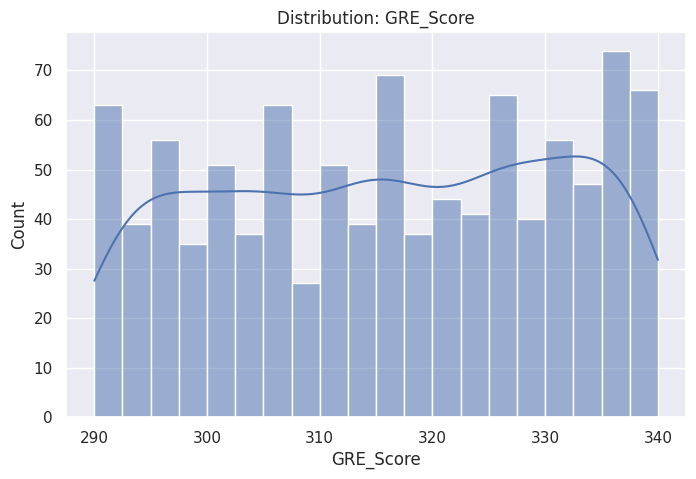

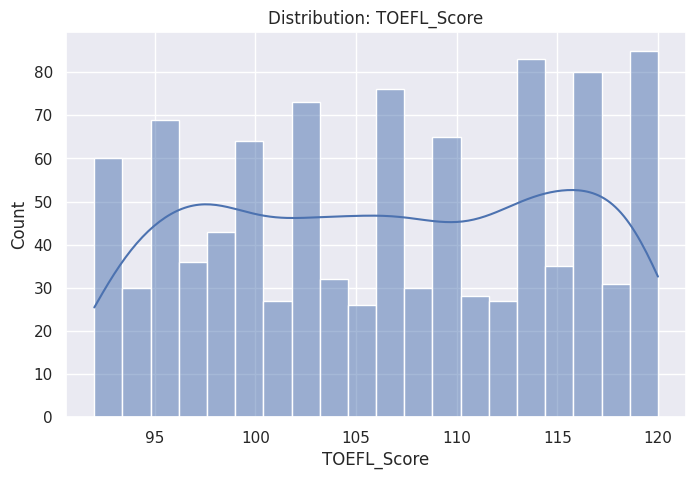

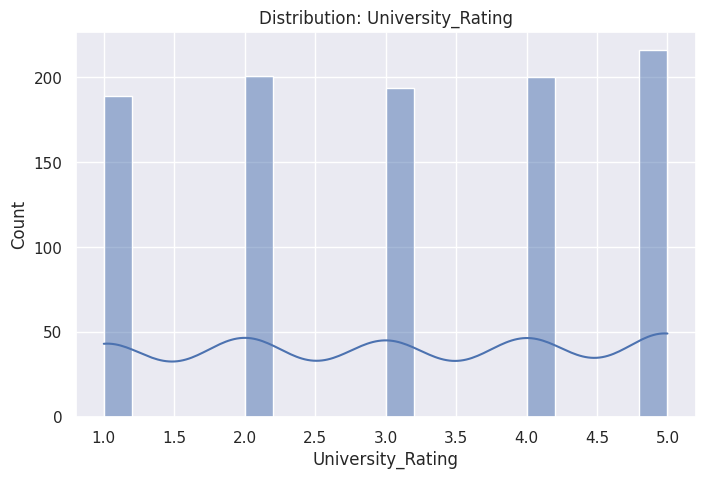

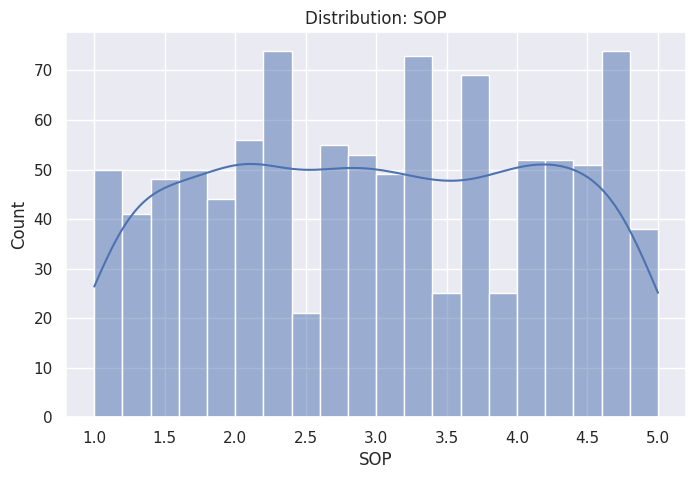

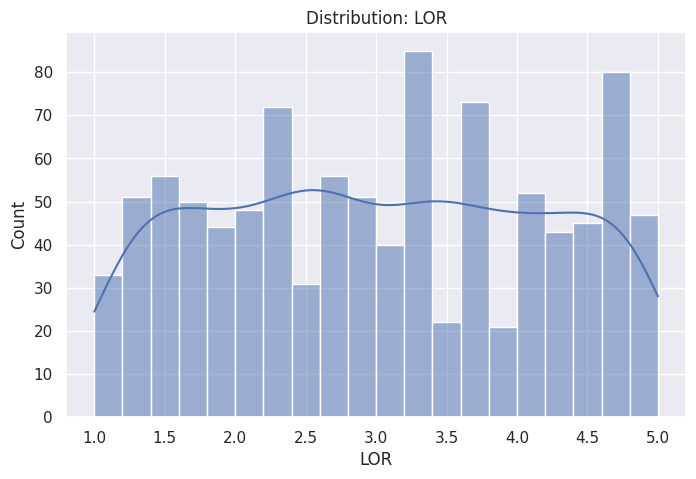

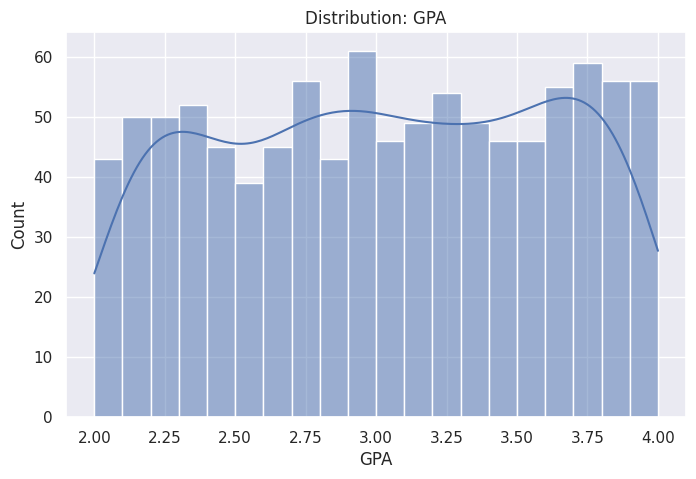

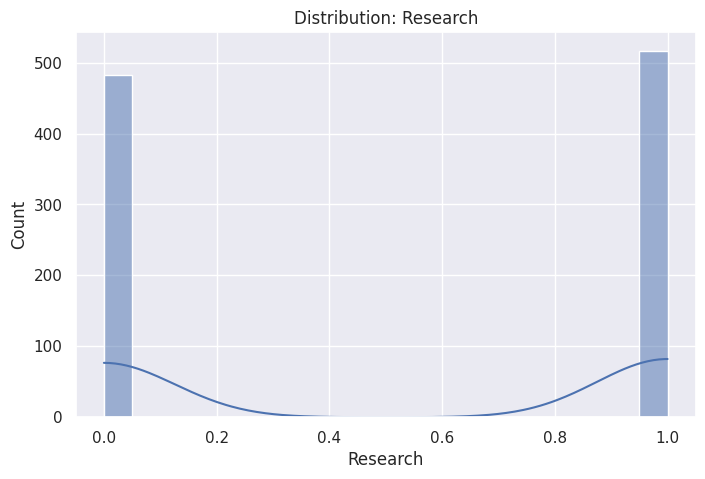

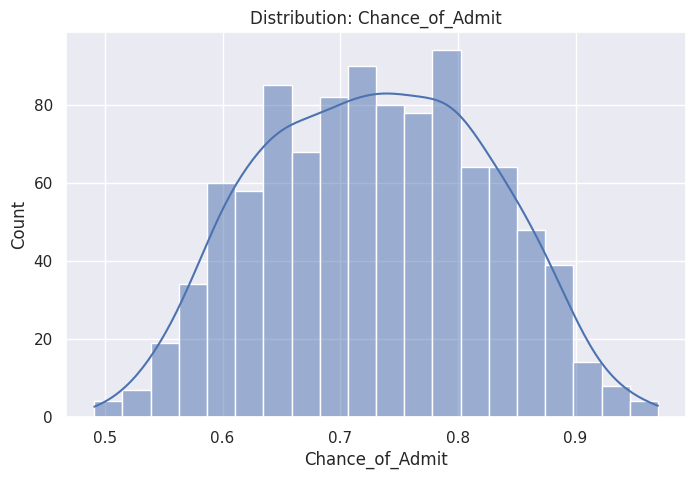

In [20]:
# Univariate distributions for numeric features
num_cols = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','GPA','Research','Chance_of_Admit']

for c in num_cols:
    fig, ax = plt.subplots()
    sns.histplot(df[c], bins=20, kde=True, ax=ax)
    ax.set_title(f"Distribution: {c}")
    plt.show()


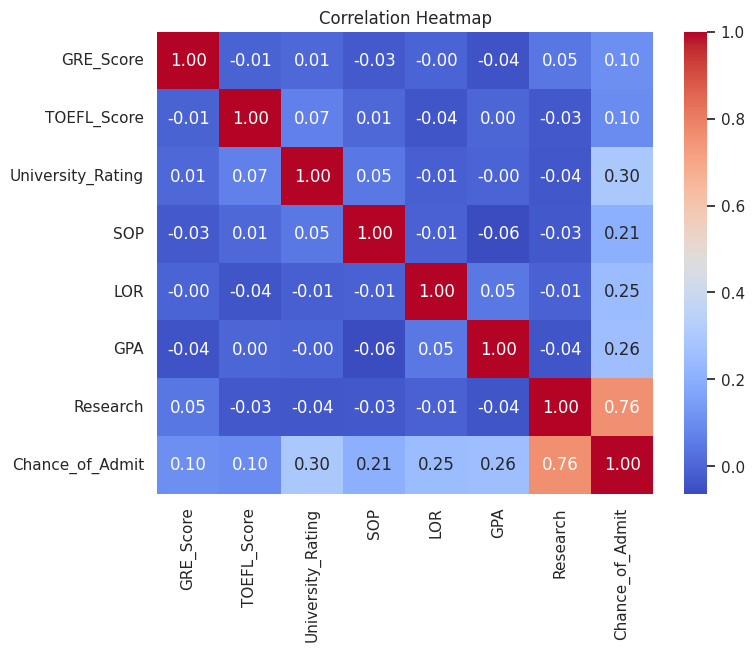

Research            0.760
University_Rating   0.296
GPA                 0.256
LOR                 0.246
SOP                 0.206
GRE_Score           0.104
TOEFL_Score         0.096
Name: Chance_of_Admit, dtype: float64

In [22]:
# Correlation matrix
corr = df[num_cols].corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
ax.set_title("Correlation Heatmap")
plt.show()

# Top correlations with the target
corr_target = corr["Chance_of_Admit"].drop("Chance_of_Admit").sort_values(ascending=False)
corr_target

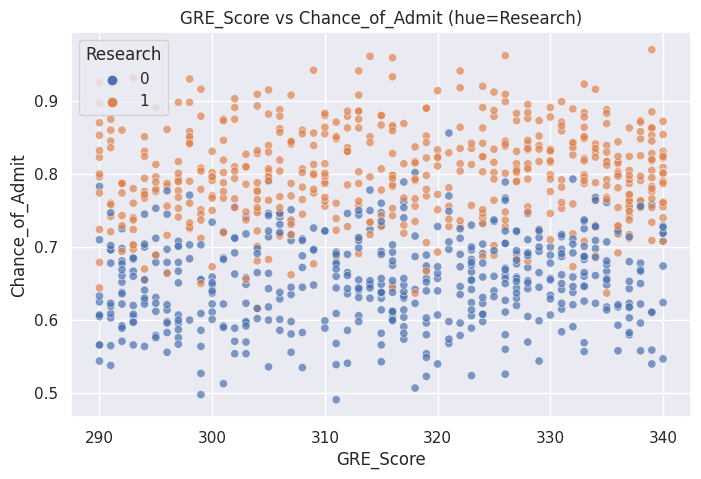

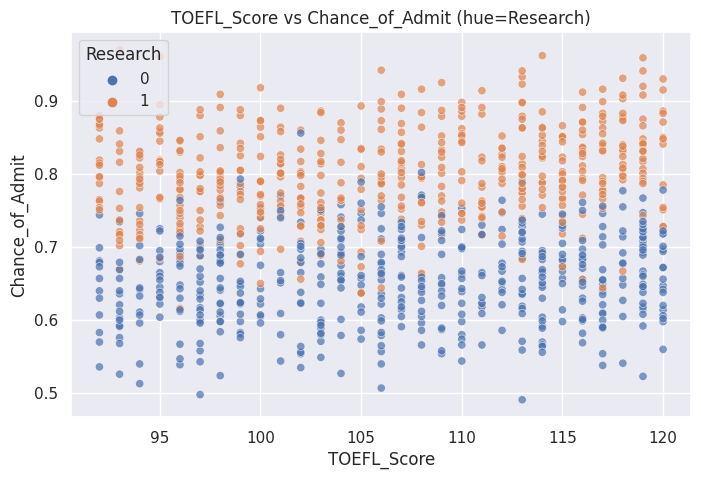

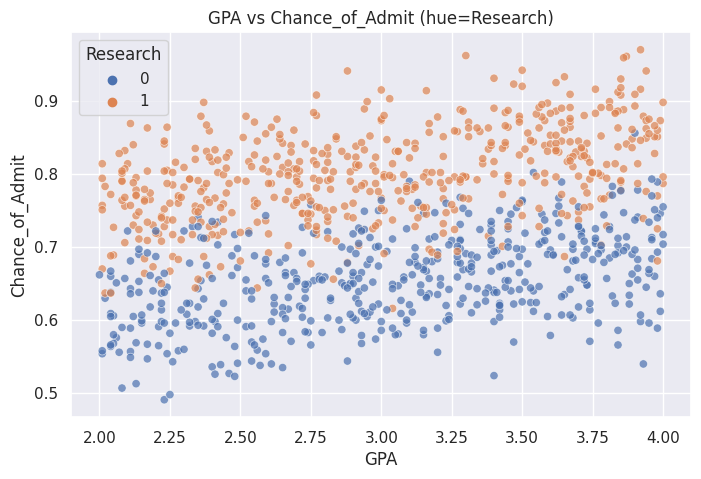

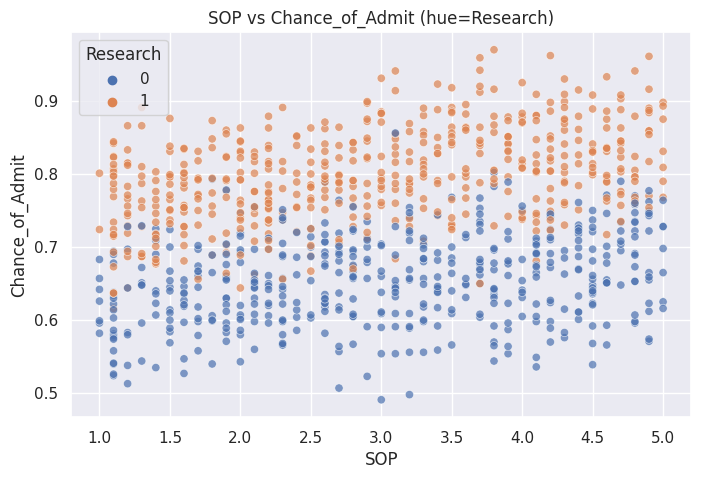

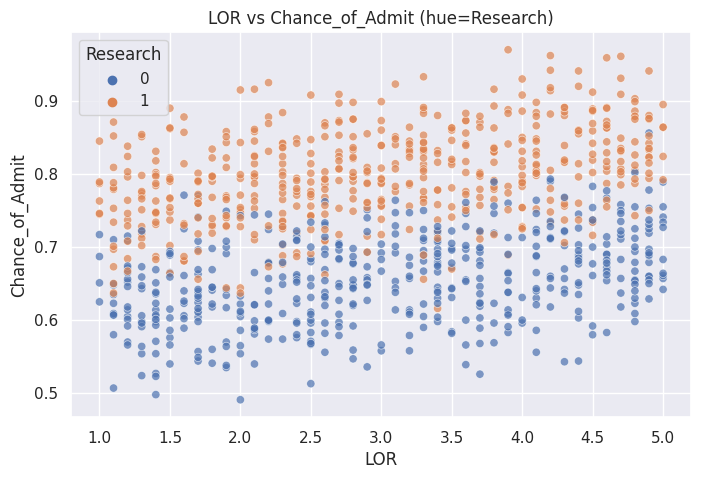

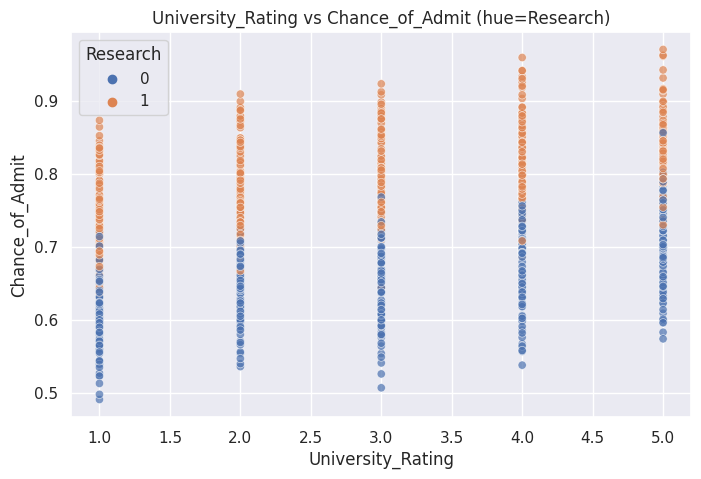

In [23]:
# Scatter vs target
features_to_plot = ['GRE_Score','TOEFL_Score','GPA','SOP','LOR','University_Rating']

for c in features_to_plot:
    fig, ax = plt.subplots()
    sns.scatterplot(data=df, x=c, y='Chance_of_Admit', hue='Research', alpha=0.7, ax=ax)
    ax.set_title(f"{c} vs Chance_of_Admit (hue=Research)")
    plt.show()


,count,mean,std,min,max
University_Rating,,,,,
1,189,0.679,0.089,0.491,0.873
2,201,0.721,0.089,0.536,0.909
3,194,0.722,0.094,0.507,0.923
4,200,0.756,0.094,0.538,0.959
5,216,0.762,0.088,0.574,0.970


,count,mean,std,min,max
Research,,,,,
0,483,0.654,0.061,0.491,0.856
1,517,0.799,0.063,0.616,0.970


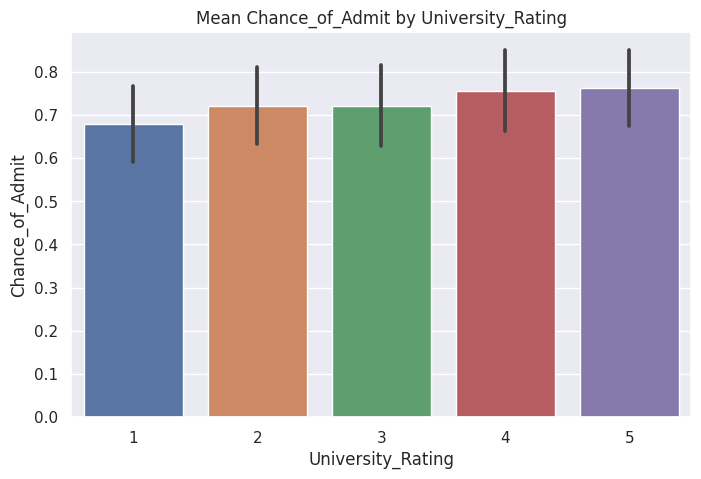

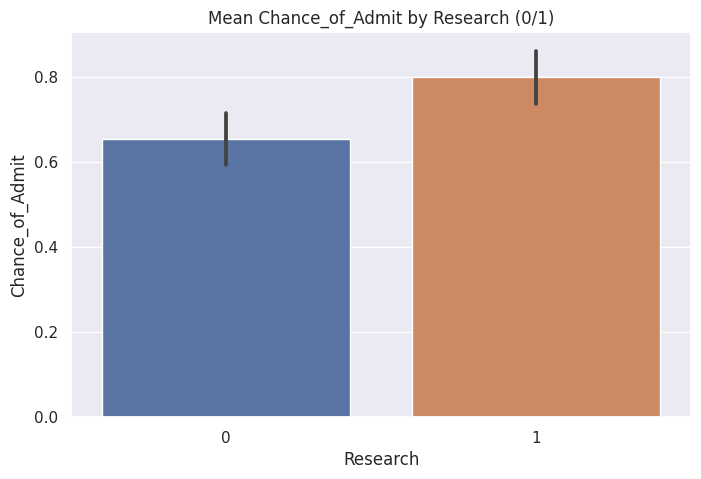

In [24]:
# Grouped summaries
# University_Rating acts like an ordinal category; Research is binary (0/1)
rating_summary = df.groupby("University_Rating")["Chance_of_Admit"].agg(["count","mean","std","min","max"])
research_summary = df.groupby("Research")["Chance_of_Admit"].agg(["count","mean","std","min","max"])
display(rating_summary)
display(research_summary)

# Barplots for easier reading
fig, ax = plt.subplots()
sns.barplot(x="University_Rating", y="Chance_of_Admit", data=df, estimator=np.mean, errorbar="sd", ax=ax)
ax.set_title("Mean Chance_of_Admit by University_Rating")
plt.show()

fig, ax = plt.subplots()
sns.barplot(x="Research", y="Chance_of_Admit", data=df, estimator=np.mean, errorbar="sd", ax=ax)
ax.set_title("Mean Chance_of_Admit by Research (0/1)")
plt.show()

In [25]:
# Flag potential outliers using z-scores (purely diagnostic)
from scipy.stats import zscore

check_cols = ['GRE_Score','TOEFL_Score','GPA','SOP','LOR']
zs = df[check_cols].apply(zscore)
outlier_rows = (np.abs(zs) > 3).any(axis=1)
print("Potential outliers:", outlier_rows.sum())
df[outlier_rows].head()


Potential outliers: 0


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,GPA,Research,Chance_of_Admit


In [27]:
target = "Chance_of_Admit"
X = df.drop(columns=[target])
y = df[target]

In [28]:
X.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,GPA,Research
0,295,96,2,4.900,1.700,2.930,0
1,340,119,3,4.100,1.700,3.760,0
2,336,96,1,3.200,1.800,3.120,1
3,337,108,4,3.400,1.300,2.110,0
4,323,98,1,1.100,1.300,3.400,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Shapes check
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (700, 7)
Validation: (150, 7)
Test: (150, 7)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict on validation and test
y_val_pred = lr.predict(X_val_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Evaluate
def evaluate_model(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"MAE:  {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")
    print("-"*40)

evaluate_model(y_val, y_val_pred, "Linear Regression (Validation)")
evaluate_model(y_test, y_test_pred, "Linear Regression (Test)")


Linear Regression (Validation) Performance:
MAE:  0.0246
MSE: 0.0009
RMSE: 0.0303
R²:   0.8959
----------------------------------------
Linear Regression (Test) Performance:
MAE:  0.0242
MSE: 0.0009
RMSE: 0.0293
R²:   0.9006
----------------------------------------


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

y_pred_test = lr.predict(X_test_scaled)
y_pred_test = np.clip(y_pred_test, 0, 1)

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

y_true_binary = (y_test >= 0.5).astype(int)
y_pred_binary = (y_pred_test >= 0.5).astype(int)
acc = accuracy_score(y_true_binary, y_pred_binary)

print("Linear Regression (Test Results)")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Accuracy: {acc*100:.2f}%")
print("-"*40)

random_sample = np.array([[320, 110, 4, 4.5, 4.0, 3.40, 1]])  # GRE, TOEFL, Rating, SOP, LOR, GPA, Research
random_sample_scaled = scaler.transform(random_sample)

predicted_chance = lr.predict(random_sample_scaled)[0]
predicted_chance = np.clip(predicted_chance, 0, 1)

print(f"Predicted Chance of Admission: {predicted_chance:.4f}")

if predicted_chance >= 0.5:
    print("Likely to be Admitted")
else:
    print("Unlikely to be Admitted")

Linear Regression (Test Results)
R²: 0.9006
MAE: 0.0242
MSE: 0.0009
RMSE: 0.0293
Accuracy: 99.33%
----------------------------------------
Predicted Chance of Admission: 0.8971
Likely to be Admitted


In [40]:
from sklearn.metrics import accuracy_score

def get_accuracy(y_true, y_pred, threshold=0.5):
    y_true_binary = (y_true >= threshold).astype(int)
    y_pred_binary = (y_pred >= threshold).astype(int)
    return accuracy_score(y_true_binary, y_pred_binary) * 100

model_names = [
    "Linear Regression (Validation)",
    "Linear Regression (Test)",
]

accuracies = [
    get_accuracy(y_val, y_val_pred),
    get_accuracy(y_test, y_test_pred),
]

import pandas as pd

accuracy_summary = pd.DataFrame({
    "Model": model_names,
    "Accuracy (%)": [round(a, 2) for a in accuracies]
})

display(accuracy_summary)

,Model,Accuracy (%)
0,Linear Regression (Validation),99.330
1,Linear Regression (Test),99.330
